## Filter Speed Test
### 1.0) Introduction
Shows how to benchmark the speed of rendering

#### 1.1) Dependencies

In [1]:
import sys
import json
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
import os
import time

from stovpy import utils, project, filters, audio, renderer
from stovpy import asset as ass


### 2.0) Project Definition
#### 2.1) Project script

In [2]:
proj_0 = project.SToVProject()
json_var_0 = proj_0.rtn_json()

img_name = 'marek-okon-9gtODWv-L5I-unsplash.png'
img_path = os.path.join(os.getcwd(),'assets', img_name)

uniqID = utils.generate_uniqID()
type_params = {'file_name':img_name,'fs':img_path, 'ftype':'full'}
asset = ass.SToVAsset(type_params['file_name'], 'photo', 0, 300, 0, 0, 1920, 1080, type_params)
asset.layer = 2
funiqID = utils.generate_uniqID()
ColorOverlayFilter = filters.SToVFilter('ColorOverlayFilter', True)
ColorOverlayFilter.set_prop_value('alpha', 0.51)
ColorOverlayFilter.set_prop_value('color', [0.8,0.2,0.2])
asset.add_filter(funiqID)
json_var_0['project_file'][funiqID] = ColorOverlayFilter.rtn_json()
json_var_0['project_file'][uniqID] = asset.rtn_json()


proj_1 = project.SToVProject()
json_var_1 = proj_1.rtn_json()

uniqID = utils.generate_uniqID()
type_params = {'file_name':img_name,'fs':img_path, 'ftype':'full'}
asset = ass.SToVAsset(type_params['file_name'], 'photo', 0, 300, 0, 0, 1920, 1080, type_params)
asset.layer = 2
funiqID = utils.generate_uniqID()
GodrayFilter = filters.SToVFilter('GodrayFilter', True)
asset.add_filter(funiqID)
json_var_1['project_file'][funiqID] = GodrayFilter.rtn_json()
json_var_1['project_file'][uniqID] = asset.rtn_json()


proj_2 = project.SToVProject()
json_var_2 = proj_2.rtn_json()

uniqID = utils.generate_uniqID()
type_params = {'file_name':img_name,'fs':img_path, 'ftype':'full'}
asset = ass.SToVAsset(type_params['file_name'], 'photo', 0, 300, 0, 0, 1920, 1080, type_params)
asset.layer = 2
funiqID = utils.generate_uniqID()
AdjustmentFilter = filters.SToVFilter('AdjustmentFilter', True)
AdjustmentFilter.set_prop_value('gamma', 3.06)
AdjustmentFilter.set_prop_value('red', 2.46)
AdjustmentFilter.set_prop_value('green', 2.68)
asset.add_filter(funiqID)
json_var_2['project_file'][funiqID] = AdjustmentFilter.rtn_json()
json_var_2['project_file'][uniqID] = asset.rtn_json()

### 3.0 Render
#### 3.1) Setup render settings

In [3]:
#Render settings.
render_settings = {}
render_settings['fps'] = 60
render_settings['fourk'] = False

render_settings['start_time'] = 0
render_settings['end_time'] = 150
render_settings['audio'] = False
render_settings['num_cores'] = 2
render_settings['limit_rate'] = 100

#### 3.2) Initialise render experiment

In [16]:
color_overlay_times = []
god_ray_times = []
adjustment_times = []
color_overlay_mem = []
god_ray_mem = []
adjustment_mem = []
color_overlay_fps = []
god_ray_fps = []
adjustment_fps = []

for i in range(0,5):
    time.sleep(10)
    t0 = time.time()
    render_settings['render_id'] = 'ColorOverlayTest'
    render = renderer.SToVRender(json_var_0['project_file'], json_var_0['document_settings'], render_settings)
    mem_usage, fps_rate = render.start_render()
    color_overlay_mem.append(mem_usage)
    color_overlay_fps.append(fps_rate)
    t1 = time.time()
    color_overlay_times.append(t1-t0)
    
    time.sleep(10)
    t0 = time.time()
    render_settings['render_id'] = 'GodrayTest'
    render = renderer.SToVRender(json_var_1['project_file'], json_var_1['document_settings'], render_settings)
    mem_usage, fps_rate = render.start_render()
    god_ray_mem.append(mem_usage)
    god_ray_fps.append(fps_rate)
    t1 = time.time()
    god_ray_times.append(t1-t0)
    
    time.sleep(10)
    t0 = time.time()
    render_settings['render_id'] = 'AdjustmentFilter'
    render = renderer.SToVRender(json_var_2['project_file'], json_var_2['document_settings'], render_settings)
    mem_usage, fps_rate = render.start_render()
    adjustment_mem.append(mem_usage)
    adjustment_fps.append(fps_rate)
    t1 = time.time()
    adjustment_times.append(t1-t0)
    
    
    


 render progress: [#########################] 100% FPS: 066.46 complete
 render progress: [#########################] 100% FPS: 042.22 complete
 render progress: [#########################] 100% FPS: 074.32 complete
 render progress: [#########################] 100% FPS: 069.27 complete
 render progress: [#########################] 100% FPS: 042.57 complete
 render progress: [#########################] 100% FPS: 061.39 complete
 render progress: [#########################] 100% FPS: 064.57 complete
 render progress: [#########################] 100% FPS: 045.15 complete
 render progress: [#########################] 100% FPS: 049.14 complete
 render progress: [#########################] 100% FPS: 046.78 complete
 render progress: [#########################] 100% FPS: 042.26 complete
 render progress: [#########################] 100% FPS: 051.41 complete
 render progress: [#########################] 100% FPS: 080.66 complete
 render progress: [#########################] 100% FPS: 039.42 c

### 4.0 Results
#### 4.1) Plot output times

<ErrorbarContainer object of 3 artists>

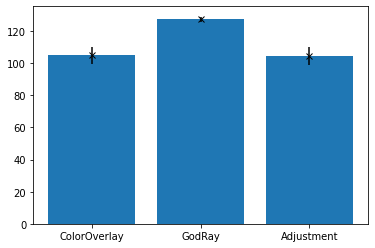

In [28]:
#for i in range(0,1):
#    print(color_overlay_times[i],god_ray_times[i],adjustment_times[i])
a = np.average(color_overlay_times)
b = np.average(god_ray_times)
c = np.average(adjustment_times)
a_std = np.std(color_overlay_times)
b_std = np.std(god_ray_times)
c_std = np.std(adjustment_times)
plt.bar(["ColorOverlay","GodRay", "Adjustment"],[a, b, c])
plt.errorbar(["ColorOverlay","GodRay", "Adjustment"],[a, b, c], yerr=[a_std, b_std, c_std], fmt="x", color="k")


In [32]:
60*150/100

90.0

Text(0.5, 0, 'iteration')

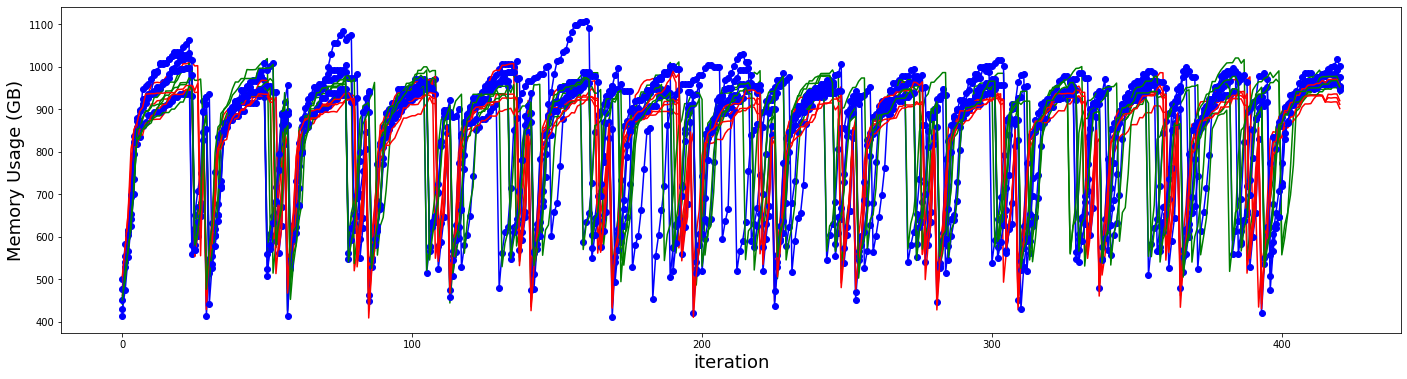

In [18]:
plt.figure(figsize=(24,6))

for i in range(0,5):
    plt.plot(color_overlay_mem[i],'bo-')
    plt.plot(god_ray_mem[i],'r-')
    plt.plot(adjustment_mem[i],'g-')
plt.ylabel('Memory Usage (GB)',fontsize=18)
plt.xlabel('iteration',fontsize=18)

Text(0.5, 0, 'iteration')

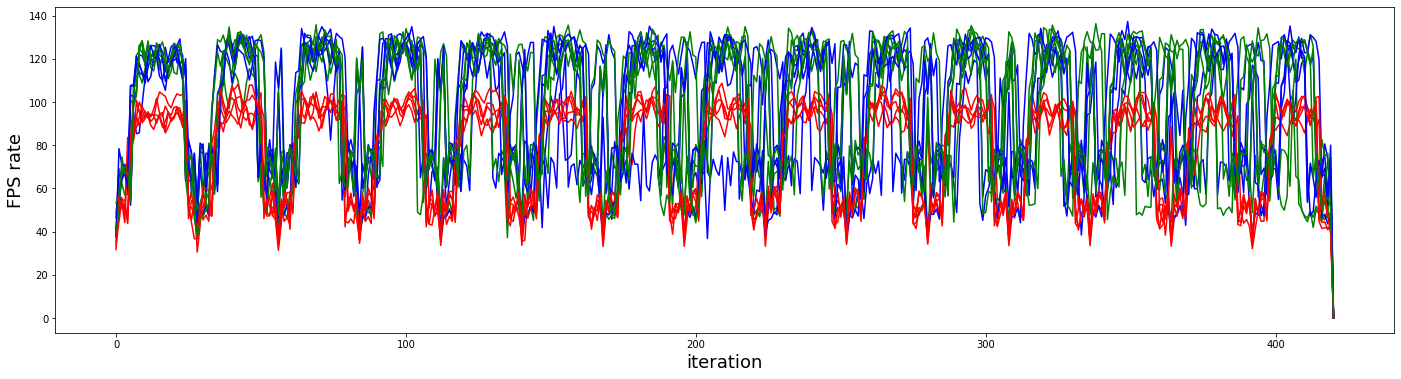

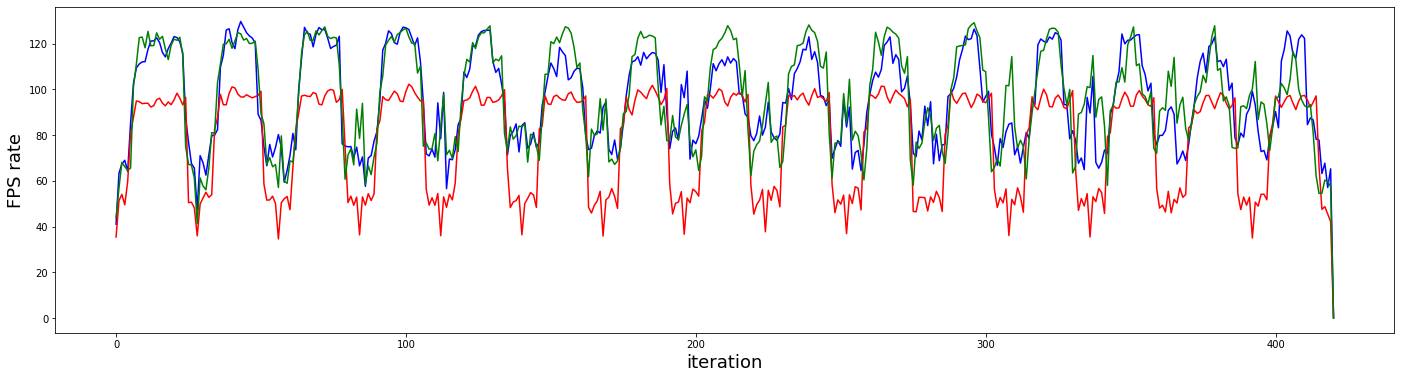

In [27]:
num_of_itr = god_ray_fps.__len__()
color_arr_fps = np.zeros(color_overlay_fps[0].__len__())
god_arr_fps =  np.zeros(god_ray_fps[0].__len__())
adjustment_arr_fps = np.zeros(adjustment_fps[0].__len__())
plt.figure(figsize=(24,6))

for i in range(0,5):
    plt.plot(color_overlay_fps[i],'b-')
    color_arr_fps[:] +=  np.array(color_overlay_fps[i])/num_of_itr
    plt.plot(god_ray_fps[i],'r-')
    god_arr_fps +=  np.array(god_ray_fps[i])[:]/num_of_itr
    plt.plot(adjustment_fps[i],'g-')
    adjustment_arr_fps +=  np.array(adjustment_fps[i])/num_of_itr
plt.ylabel('FPS rate',fontsize=18)
plt.xlabel('iteration',fontsize=18)
plt.figure(figsize=(24,6))
plt.plot(color_arr_fps,'b-')
plt.plot(god_arr_fps,'r-')
plt.plot(adjustment_arr_fps,'g-')
plt.ylabel('FPS rate',fontsize=18)
plt.xlabel('iteration',fontsize=18)

In [ ]:
np.array(color_overlay_fps[i]).shape

In [22]:
num_of_itr

5